In [1]:
%autosave 60

Autosaving every 60 seconds


In [2]:
%run init.ipynb
%run init-tensor_product.ipynb
%run init-quantum_resources.ipynb
%run init-optical_elements.ipynb

In [3]:
from qiskit.quantum_info import entropy, DensityMatrix

In [4]:
%run init-qiskit.ipynb

C:\Users\stark\AppData\Local\Temp\ipykernel_13084\1918398002.py:6: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
ibmqfactory.load_account:WARNING:2023-05-25 06:55:38,957: Credentials are already in use. The existing account in the session will be replaced.


ibm_peekskill                ibm_perth                    ibm_nairobi
-------------                ---------                    -----------
Num. Qubits:  27             Num. Qubits:  7              Num. Qubits:  7
Pending Jobs: 3              Pending Jobs: 77             Pending Jobs: 197
Least busy:   True           Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      381.9          Avg. T1:      152.8          Avg. T1:      117.3
Avg. T2:      309.0          Avg. T2:      131.6          Avg. T2:      74.2



ibm_lagos                    ibmq_manila                  ibmq_jakarta
---------                    -----------                  ------------
Num. Qubits:  7              Num. Qubits:  5              Num. Qubits:  7
Pending Jobs: 174            Pending Jobs: 26             Pending Jobs: 72
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True          

In [5]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.20.2', 'qiskit-aer': '0.10.4', 'qiskit-ignis': '0.7.1', 'qiskit-ibmq-provider': '0.19.1', 'qiskit-aqua': None, 'qiskit': '0.36.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [6]:
%run init-qiskit_optical_elements.ipynb

# Irrealidade do caminho $b$ dentro do IMZ

## BBO$_{p}$ - Dentro do IMZ - QWP$_{in}$

In [16]:
thmax = math.pi-0.01;   dth = thmax/20; th = np.arange(0.01, thmax+dth, dth); d = th.shape[0]
rhob_AbWZ_in             = np.zeros(th.shape[0], dtype=object)
rhob_0bWZ_in             = np.zeros(th.shape[0], dtype=object)
Phi_b_0bWZ_in            = np.zeros(th.shape[0], dtype=object)
Irr_b_in                 = np.zeros(th.shape[0], dtype=object)
jobs_ids_b_in = []

In [13]:
thmax = math.pi-0.01;   dth = thmax/20; th = np.arange(0.01, thmax+dth, dth); d = th.shape[0]
rhob_AbWZ_out            = np.zeros(th.shape[0], dtype=object)
rhob_0bWZ_out            = np.zeros(th.shape[0], dtype=object)
Phi_b_0bWZ_out           = np.zeros(th.shape[0], dtype=object)
Irr_b_out                = np.zeros(th.shape[0], dtype=object)
jobs_ids_b_out = []

<img src = 'setup_realism.jpg' width = '90%'>

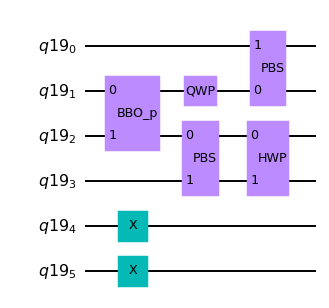

In [11]:
def qc_QCRb_in(th):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr, name = 'QCR')
    qc_BBO_p_ = qc_BBO_p(th); qc.append(qc_BBO_p_, [qr[1],qr[2]])              # BBO_p
    qc_QWP_ = qc_QWP(); qc.append(qc_QWP_, [qr[1]])                            # QWP
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[1],qr[0]])                      # PBS_A
    # IMZ
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[2],qr[3]])                      # PBS
    qc_HWP_ = qc_HWP(); qc.append(qc_HWP_, [qr[2],qr[3]])                      # HWP
    qc.x(4); qc.x(5)                                                           # Atoms's innitial state
    #qc_AtmInt_ = qc_AtmInt(); qc.append(qc_AtmInt_, [qr[3],qr[4],qr[5]])      # Atoms' interaction
    #qc_M_ = qc_M(); qc.append(qc_M_, [qr[3]])                                 # Mirrors
    #qc_PS_ = qc_PS(ph); qc.append(qc_PS_, [qr[3]])                            # Phase
    #qc_BS_ = qc_BS(); qc.append(qc_BS_, [qr[3]])                              # BS
    return qc
qc_QCRb_in_ = qc_QCRb_in(math.pi); qc_QCRb_in_.draw(output = 'mpl', scale = 0.7)

In [13]:
device = provider.get_backend('ibm_nairobi')

In [ ]:
print(device)
for j in range(0, d):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
    #
    # Circuito
    #
    qc_QCRb_in_ = qc_QCRb_in(th[j]); qc.append(qc_QCRb_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
    #
    # Tomography
    #
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
    job = qiskit.execute(qstc, backend = device, shots=nshots)
    print(job.job_id()); job_monitor(job)
    jobs_ids_b_in.append(job.job_id())
    qstf = StateTomographyFitter(job.result(), qstc)
    #
    # rho
    #
    rhob_AbWZ_in[j] = qstf.fit(method='lstsq')
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

ibm_nairobi
chb0nc0dickn60j1i23g
Job Status: job has successfully run
j =  0  - theta = 0.01
chb1fl5v6mngo8m6h6l0
Job Status: job has successfully run
j =  1  - theta = 0.16657963267948966
chb5628fdairicmktu60
Job Status: job has successfully run
j =  2  - theta = 0.3231592653589793
chb8u1pmfb1ddb4vccb0
Job Status: job has successfully run
j =  3  - theta = 0.479738898038469
chbckvoo51arsodcbrbg
Job Status: job has successfully run
j =  4  - theta = 0.6363185307179586
chbfp70o51arsode4alg
Job Status: job has successfully run
j =  5  - theta = 0.7928981633974483
chbgbilv6mngo8mib9p0
Job Status: job has successfully run
j =  6  - theta = 0.9494777960769379
chbhv5lv6mngo8mjavhg
Job Status: job has successfully run
j =  7  - theta = 1.1060574287564275
chbk249mfb1ddb55e200
Job Status: job has successfully run
j =  8  - theta = 1.2626370614359173
chbnos44cg5fl02loklg
Job Status: job has successfully run
j =  9  - theta = 1.419216694115407
chbosipmfb1ddb58sfa0
Job Status: job has successfully

In [10]:
print(device)
for j in range(12, d):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
    #
    # Circuito
    #
    qc_QCRb_in_ = qc_QCRb_in(th[j]); qc.append(qc_QCRb_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
    #
    # Tomography
    #
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
    job = qiskit.execute(qstc, backend = device, shots=nshots)
    print(job.job_id()); job_monitor(job)
    jobs_ids_b_in.append(job.job_id())
    qstf = StateTomographyFitter(job.result(), qstc)
    #
    # rho
    #
    rhob_AbWZ_in[j] = qstf.fit(method='lstsq')
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

ibm_nairobi
chc4hioq13ef4a8f6kmg
Job Status: job has successfully run
j = 12  - theta = 1.8889555921538759
chc8c18o51arsodsrlrg
Job Status: job has successfully run
j = 13  - theta = 2.0455352248333654
chce3e0o51arsoe22k80
Job Status: job has successfully run
j = 14  - theta = 2.202114857512855
chcf125v6mngo8n6qpe0
Job Status: job has successfully run
j = 15  - theta = 2.358694490192345
chcf8v176h9ab2d3r7u0
Job Status: job has successfully run
j = 16  - theta = 2.5152741228718343
chcfha976h9ab2d453b0
Job Status: job has successfully run
j = 17  - theta = 2.6718537555513238
chcfp5dv6mngo8n7lrng
Job Status: job has successfully run
j = 18  - theta = 2.8284333882308137
chcjja8fdairicnkqb20
Job Status: job has successfully run
j = 19  - theta = 2.985013020910303
chcjt1hmfb1ddb5srus0
Job Status: job is actively running

IBMQJobApiError: "'400 Client Error: Bad Request for url: https://api.quantum-computing.ibm.com/api/Network/ibm-q/Groups/open/Projects/main/Jobs/chcjt1hmfb1ddb5srus0/status/v/1. Error in runtime client calling method getJob: Error executing GET https://runtime-us-east.quantum-computing.ibm.com/jobs/chcjt1hmfb1ddb5srus0 {No request body}, Error code: 2413.'"

In [15]:
import time

In [16]:
print(device)
start_time = time.time()
for j in range(20, d):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
    #
    # Circuito
    #
    qc_QCRb_in_ = qc_QCRb_in(th[j]); qc.append(qc_QCRb_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
    #
    # Tomography
    #
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
    job = qiskit.execute(qstc, backend = device, shots=nshots)
    print(job.job_id()); job_monitor(job)
    jobs_ids_b_in.append(job.job_id())
    qstf = StateTomographyFitter(job.result(), qstc)
    #
    # rho
    #
    rhob_AbWZ_in[j] = qstf.fit(method='lstsq')
    print('j = {:2d}  - theta = {}'.format(j, th[j]))
end_time = time.time()

ibm_nairobi
chcpcdp76h9ab2dcnptg
Job Status: job has successfully run
j = 20  - theta = 3.141592653589793


In [27]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")

Tempo de execução: 27447.29 segundos


In [28]:
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")

Tempo de execução: 457.45 minutos


In [29]:
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")

Tempo de execução: 7.62 horas


In [ ]:
chb0nc0dickn60j1i23g
Job Status: job has successfully run
j =  0  - theta = 0.01
chb1fl5v6mngo8m6h6l0
Job Status: job has successfully run
j =  1  - theta = 0.16657963267948966
chb5628fdairicmktu60
Job Status: job has successfully run
j =  2  - theta = 0.3231592653589793
chb8u1pmfb1ddb4vccb0
Job Status: job has successfully run
j =  3  - theta = 0.479738898038469
chbckvoo51arsodcbrbg
Job Status: job has successfully run
j =  4  - theta = 0.6363185307179586
chbfp70o51arsode4alg
Job Status: job has successfully run
j =  5  - theta = 0.7928981633974483
chbgbilv6mngo8mib9p0
Job Status: job has successfully run
j =  6  - theta = 0.9494777960769379
chbhv5lv6mngo8mjavhg
Job Status: job has successfully run
j =  7  - theta = 1.1060574287564275
chbk249mfb1ddb55e200
Job Status: job has successfully run
j =  8  - theta = 1.2626370614359173
chbnos44cg5fl02loklg
Job Status: job has successfully run
j =  9  - theta = 1.419216694115407
chbosipmfb1ddb58sfa0
Job Status: job has successfully run
j = 10  - theta = 1.5757963267948967
chbrfi5v6mngo8mpokd0
Job Status: job has successfully run
j = 11  - theta = 1.7323759594743862
chc4hioq13ef4a8f6kmg
Job Status: job has successfully run
j = 12  - theta = 1.8889555921538759
chc8c18o51arsodsrlrg
Job Status: job has successfully run
j = 13  - theta = 2.0455352248333654
chce3e0o51arsoe22k80
Job Status: job has successfully run
j = 14  - theta = 2.202114857512855
chcf125v6mngo8n6qpe0
Job Status: job has successfully run
j = 15  - theta = 2.358694490192345
chcf8v176h9ab2d3r7u0
Job Status: job has successfully run
j = 16  - theta = 2.5152741228718343
chcfha976h9ab2d453b0
Job Status: job has successfully run
j = 17  - theta = 2.6718537555513238
chcfp5dv6mngo8n7lrng
Job Status: job has successfully run
j = 18  - theta = 2.8284333882308137
chcjja8fdairicnkqb20
Job Status: job has successfully run
j = 19  - theta = 2.985013020910303
chcpcdp76h9ab2dcnptg
Job Status: job has successfully run
j = 20  - theta = 3.141592653589793

In [10]:
jobs_ids_b_in = ['chb0nc0dickn60j1i23g',
'chb1fl5v6mngo8m6h6l0',
'chb5628fdairicmktu60',
'chb8u1pmfb1ddb4vccb0',
'chbckvoo51arsodcbrbg',
'chbfp70o51arsode4alg',
'chbgbilv6mngo8mib9p0',
'chbhv5lv6mngo8mjavhg',
'chbk249mfb1ddb55e200',
'chbnos44cg5fl02loklg',
'chbosipmfb1ddb58sfa0',
'chbrfi5v6mngo8mpokd0',
'chc4hioq13ef4a8f6kmg',
'chc8c18o51arsodsrlrg',
'chce3e0o51arsoe22k80',
'chcf125v6mngo8n6qpe0',
'chcf8v176h9ab2d3r7u0',
'chcfha976h9ab2d453b0',
'chcfp5dv6mngo8n7lrng',
'chcjja8fdairicnkqb20',
'chcpcdp76h9ab2dcnptg']

In [11]:
jobs_ids_b_in

['chb0nc0dickn60j1i23g',
 'chb1fl5v6mngo8m6h6l0',
 'chb5628fdairicmktu60',
 'chb8u1pmfb1ddb4vccb0',
 'chbckvoo51arsodcbrbg',
 'chbfp70o51arsode4alg',
 'chbgbilv6mngo8mib9p0',
 'chbhv5lv6mngo8mjavhg',
 'chbk249mfb1ddb55e200',
 'chbnos44cg5fl02loklg',
 'chbosipmfb1ddb58sfa0',
 'chbrfi5v6mngo8mpokd0',
 'chc4hioq13ef4a8f6kmg',
 'chc8c18o51arsodsrlrg',
 'chce3e0o51arsoe22k80',
 'chcf125v6mngo8n6qpe0',
 'chcf8v176h9ab2d3r7u0',
 'chcfha976h9ab2d453b0',
 'chcfp5dv6mngo8n7lrng',
 'chcjja8fdairicnkqb20',
 'chcpcdp76h9ab2dcnptg']

In [12]:
len(jobs_ids_b_in)

In [13]:
f = open("jobs_ids_b_in.txt", "w")
f.write(str(jobs_ids_b_in))
f.close()

In [7]:
f = open("jobs_ids_b_in.txt","r")
list_ids_b_in_ = f.read().replace("'","").replace(" ","").replace("[","").replace("]","").split(",")
f.close()

In [8]:
list_ids_b_in_

['chb0nc0dickn60j1i23g',
 'chb1fl5v6mngo8m6h6l0',
 'chb5628fdairicmktu60',
 'chb8u1pmfb1ddb4vccb0',
 'chbckvoo51arsodcbrbg',
 'chbfp70o51arsode4alg',
 'chbgbilv6mngo8mib9p0',
 'chbhv5lv6mngo8mjavhg',
 'chbk249mfb1ddb55e200',
 'chbnos44cg5fl02loklg',
 'chbosipmfb1ddb58sfa0',
 'chbrfi5v6mngo8mpokd0',
 'chc4hioq13ef4a8f6kmg',
 'chc8c18o51arsodsrlrg',
 'chce3e0o51arsoe22k80',
 'chcf125v6mngo8n6qpe0',
 'chcf8v176h9ab2d3r7u0',
 'chcfha976h9ab2d453b0',
 'chcfp5dv6mngo8n7lrng',
 'chcjja8fdairicnkqb20',
 'chcpcdp76h9ab2dcnptg']

## Retrieve $b_{in}$ 

In [44]:
thmax = math.pi-0.01;   dth = thmax/20; th = np.arange(0.01, thmax+dth, dth); d = th.shape[0]
ret_rhob_AbWZ_in             = np.zeros(th.shape[0], dtype=object)
ret_rhob_AbWZ_out            = np.zeros(th.shape[0], dtype=object)
ret_rhob_0bWZ_in             = np.zeros(th.shape[0], dtype=object)
ret_rhob_0bWZ_out            = np.zeros(th.shape[0], dtype=object)
ret_Phi_b_0bWZ_in            = np.zeros(th.shape[0], dtype=object)
ret_Phi_b_0bWZ_out           = np.zeros(th.shape[0], dtype=object)
ret_Irr_b_in                 = np.zeros(th.shape[0])
ret_Irr_b_out                = np.zeros(th.shape[0])

In [45]:
print(device)
for j in range(0, d):
    print(list_ids_b_in_[j])
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
    qc_QCRb_in_ = qc_QCRb_in(th[j]); qc.append(qc_QCRb_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
    job_ret_b_in = device.retrieve_job(list_ids_b_in_[j])
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
    print(job_ret_b_in.job_id())
    qstf = StateTomographyFitter(job_ret_b_in.result(), qstc)
    #
    # rho
    #
    ret_rhob_AbWZ_in[j] = qstf.fit(method='lstsq')
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

ibm_nairobi
chb0nc0dickn60j1i23g
chb0nc0dickn60j1i23g
j =  0  - theta = 0.01
chb1fl5v6mngo8m6h6l0
chb1fl5v6mngo8m6h6l0
j =  1  - theta = 0.16657963267948966
chb5628fdairicmktu60
chb5628fdairicmktu60
j =  2  - theta = 0.3231592653589793
chb8u1pmfb1ddb4vccb0
chb8u1pmfb1ddb4vccb0
j =  3  - theta = 0.479738898038469
chbckvoo51arsodcbrbg
chbckvoo51arsodcbrbg
j =  4  - theta = 0.6363185307179586
chbfp70o51arsode4alg
chbfp70o51arsode4alg
j =  5  - theta = 0.7928981633974483
chbgbilv6mngo8mib9p0
chbgbilv6mngo8mib9p0
j =  6  - theta = 0.9494777960769379
chbhv5lv6mngo8mjavhg
chbhv5lv6mngo8mjavhg
j =  7  - theta = 1.1060574287564275
chbk249mfb1ddb55e200
chbk249mfb1ddb55e200
j =  8  - theta = 1.2626370614359173
chbnos44cg5fl02loklg
chbnos44cg5fl02loklg
j =  9  - theta = 1.419216694115407
chbosipmfb1ddb58sfa0
chbosipmfb1ddb58sfa0
j = 10  - theta = 1.5757963267948967
chbrfi5v6mngo8mpokd0
chbrfi5v6mngo8mpokd0
j = 11  - theta = 1.7323759594743862
chc4hioq13ef4a8f6kmg
chc4hioq13ef4a8f6kmg
j = 12  - the

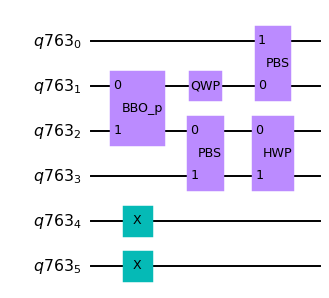

In [46]:
qc.decompose().draw(output = 'mpl', scale = 0.7)

### Cálculos

#### QWP$_{in}$

In [47]:
for j in range(0,d):
    ret_rhob_0bWZ_in[j] = projM_np(8, '0', ret_rhob_AbWZ_in[j])
    ret_Phi_b_0bWZ_in[j] = dephasing_map_3qubits_np(ret_rhob_0bWZ_in[j])
    ret_Irr_b_in[j] = entropy(ret_Phi_b_0bWZ_in[j]) - entropy(ret_rhob_0bWZ_in[j])
    print(ret_Irr_b_in[j])

0.018987056255594492
0.04801487611629862
0.14927440992896357
0.2133427402368454
0.29018166010561164
0.3833800025398766
0.46044732269099853
0.5221012136705849
0.5298971498306021
0.5349601201806012
0.5222777796382683
0.5348456726263274
0.47825150262170457
0.4031332862025323
0.3342801365526341
0.21981974620756806
0.14904974572909224
0.06765554611756497
0.03616602104092492
0.009820341851665582
0.02112206401021599


#### Gráficos

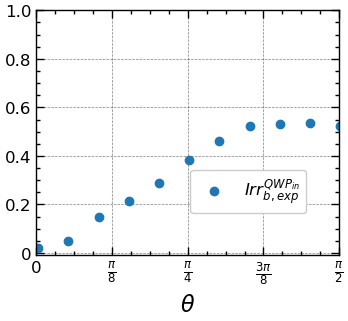

In [48]:
import string
plt.figure(figsize = (6.5, 3.2), constrained_layout = True)
#plt.subplots(figsize=(6.5, 3.2))
font = {'family': 'Verdana', 'color':  'black', 'size': 20}
#
plt.style.use(['science', 'notebook', 'grid'])
ax0 = plt.subplot(121)
plt.gca().set_xlim([-0.01,3.14])
plt.gca().set_ylim([-0.01,0.52])
#
# simulation
#
plt.plot(th[:len(th)//2+1], ret_Irr_b_in[:len(th)//2+1], 'o' ,
         color='#1f77b4', label = r'$Irr_{b, exp}^{QWP_{in}}$')
#plt.plot(th[:len(th)//2+1], Irr_b_out[:len(th)//2+1], '--',
#         color='#ff7f0e', label = r'$Irr_{b,exp}^{QWP_{out}}$')
#
#
plt.legend(bbox_to_anchor=(0.7, 0.26), loc='center',
           borderaxespad=0, fontsize=12)
#, frameon=False, handlelength=1.5
plt.xlabel(r'$\theta$')
tick_posx= [0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2]
#, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi]
labelsx = ['0', r'$\frac{\pi}{8}$', r'$\frac{\pi}{4}$',
           r'$\frac{3\pi}{8}$', r'$\frac{\pi}{2}$']
#, r'$\frac{3\pi}{4}$', r'$\pi$', r'$\frac{5\pi}{4}$'
#, r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$', r'$2\pi$']
tick_posy= [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labelsy = ['0', '0.2', '0.4', '0.6', '0.8', '1.0']
#tick_posx= [0, 5]
#labelsx = ['0', '5']
plt.xlim([0, np.pi/2])
plt.xticks(tick_posx, labelsx)
plt.yticks(tick_posy, labelsy)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.tick_params('y', labelleft=False)
#ax1.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax1.transAxes, 
#            size=20, weight='bold')
#
#plt.tight_layout()
#plt.savefig('zgraph_CCR_vpv=0_sim.pdf', format='pdf', dpi = 1200, bbox_inches='tight')
plt.show()

## BBO$_{p}$ - Dentro do IMZ - QWP$_{out}$

<img src = 'setup_realism.jpg' width = '90%'>

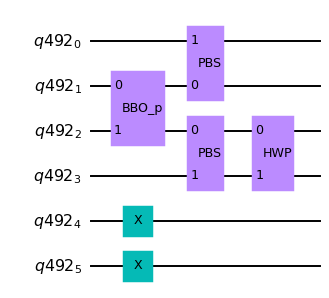

In [39]:
def qc_QCRb_out(th):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr, name = 'QCR')
    qc_BBO_p_ = qc_BBO_p(th); qc.append(qc_BBO_p_, [qr[1],qr[2]])              # BBO_p
    #qc_QWP_ = qc_QWP(); qc.append(qc_QWP_, [qr[1]])                           # QWP
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[1],qr[0]])                      # PBS_A
    # IMZ
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[2],qr[3]])                      # PBS
    qc_HWP_ = qc_HWP(); qc.append(qc_HWP_, [qr[2],qr[3]])                      # HWP
    qc.x(4); qc.x(5) # Atoms's innitial state
    #qc_AtmInt_ = qc_AtmInt(); qc.append(qc_AtmInt_, [qr[3],qr[4],qr[5]])      # Atoms' interaction
    #qc_M_ = qc_M(); qc.append(qc_M_, [qr[3]])                                 # Mirrors
    #qc_PS_ = qc_PS(ph); qc.append(qc_PS_, [qr[3]])                            # Phase
    #qc_BS_ = qc_BS(); qc.append(qc_BS_, [qr[3]])                              # BS
    return qc
qc_QCRb_out_ = qc_QCRb_out(math.pi); qc_QCRb_out_.draw(output = 'mpl', scale = 0.7)

In [63]:
print(device)
start_time2 = time.time()
try:
    for j in range(0,d):
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuit
        #
        qc_QCRb_out_ = qc_QCRb_out(th[j]); qc.append(qc_QCRb_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        print(job.job_id()); job_monitor(job)
        jobs_ids_b_out.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        #
        # rho
        #
        rhob_AbWZ_out[j] = qstf.fit(method='lstsq')
        print('j = {:2d}  - theta = {}'.format(j, th[j]))
except:
    print("\n\nErro detectado em Bloco 2: ", sys.exc_info()[1])
    winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
    winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
    winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
    winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time2 = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms

ibm_nairobi
chelpsn7uma4tn78rc2g
Job Status: job has successfully run
j =  0  - theta = 0.01
chep59kqqnv6prm1uccg
Job Status: job has successfully run
j =  1  - theta = 0.16657963267948966
chesmsf9targ2vpmqkig
Job Status: job has successfully run
j =  2  - theta = 0.3231592653589793
chf07ob66hmpifuql4jg
Job Status: job has successfully run
j =  3  - theta = 0.479738898038469
chf0fj79targ2vpr406g
Job Status: job has successfully run
j =  4  - theta = 0.6363185307179586
chf0jqvppn69h5prdplg
Job Status: job has successfully run
j =  5  - theta = 0.7928981633974483
chf0o1nppn69h5pri8a0
Job Status: job has successfully run
j =  6  - theta = 0.9494777960769379
chf0s8g4sb77opi8pskg
Job Status: job has successfully run
j =  7  - theta = 1.1060574287564275
chf10jmo5i9gdbb1rjsg
Job Status: job has successfully run
j =  8  - theta = 1.2626370614359173
chf151uo5i9gdbb20lu0
Job Status: job is queued (None)

Erro detectado em Bloco 2:  "'400 Client Error: Bad Request for url: https://api.quantum-com

In [66]:
execution_time2_seg = end_time2 - start_time2
print("Tempo de execução:", round(execution_time2_seg, 2), "segundos")
execution_time2_min = execution_time2_seg/60
print("Tempo de execução:", round(execution_time2_min, 2), "minutos")
execution_time2_h = execution_time2_min/60
print("Tempo de execução:", round(execution_time2_h, 2), "horas")
execution_time2_1_h = execution_time2_h/j
print("Tempo de execução por job:", round(execution_time2_1_h, 2), "horas ")

Tempo de execução: 56057.82 segundos
Tempo de execução: 934.3 minutos
Tempo de execução: 15.57 horas
Tempo de execução por job: 1.73 horas 


In [67]:
k = j
k

In [70]:
print(device)
start_time2 = time.time()
try:
    try:
        print('trytry, k=',k)
        for j in range(k,d):
            qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
            #
            # Circuit
            #
            qc_QCRb_out_ = qc_QCRb_out(th[j]); qc.append(qc_QCRb_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
            #
            # Tomography
            #
            qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ
            job = qiskit.execute(qstc, backend = device, shots=nshots)
            print(job.job_id()); job_monitor(job)
            jobs_ids_b_out.append(job.job_id())
            qstf = StateTomographyFitter(job.result(), qstc)
            #
            # rho
            #
            rhob_AbWZ_out[j] = qstf.fit(method='lstsq')
            print('j = {:2d}  - theta = {}'.format(j, th[j]))
    except:
        print('tryexcept, k=',k)
        k = j
        for j in range(k,d):
            qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
            #
            # Circuit
            #
            qc_QCRb_out_ = qc_QCRb_out(th[j]); qc.append(qc_QCRb_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
            #
            # Tomography
            #
            qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ
            job = qiskit.execute(qstc, backend = device, shots=nshots)
            print(job.job_id()); job_monitor(job)
            jobs_ids_b_out.append(job.job_id())
            qstf = StateTomographyFitter(job.result(), qstc)
            #
            # rho
            #
            rhob_AbWZ_out[j] = qstf.fit(method='lstsq')
            print('j = {:2d}  - theta = {}'.format(j, th[j]))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
    winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
    winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
    winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
    winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time2 = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms

ibm_nairobi
trytry, k= 9
chf4t0sp8f687ogloj2g
Job Status: job has successfully run
j =  9  - theta = 1.419216694115407
chf8gc6o5i9gdbbagde0
Job Status: job has successfully run
j = 10  - theta = 1.5757963267948967
chfcbncp8f687ogte7s0
Job Status: job has successfully run
j = 11  - theta = 1.7323759594743862
chfch9vppn69h5q89pug
Job Status: job has successfully run
j = 12  - theta = 1.8889555921538759
chfclgj66hmpifv83nr0
Job Status: job has successfully run
j = 13  - theta = 2.0455352248333654
chfcs3kp8f687ogtslfg
Job Status: job has successfully run
j = 14  - theta = 2.202114857512855
chfd0e366hmpifv8cp7g
Job Status: job has successfully run
j = 15  - theta = 2.358694490192345
chfd7c04sb77opiludd0
Job Status: job has successfully run
j = 16  - theta = 2.5152741228718343
chfde0f9targ2vq8tna0
Job Status: job has successfully run
j = 17  - theta = 2.6718537555513238
chfdkeo4sb77opim9rfg
Job Status: job has successfully run
j = 18  - theta = 2.8284333882308137
chfdorj66hmpifv92d4g
Job Sta

In [71]:
execution_time2_seg = end_time2 - start_time2
print("Tempo de execução:", round(execution_time2_seg, 2), "segundos")
execution_time2_min = execution_time2_seg/60
print("Tempo de execução:", round(execution_time2_min, 2), "minutos")
execution_time2_h = execution_time2_min/60
print("Tempo de execução:", round(execution_time2_h, 2), "horas")
execution_time2_1_h = execution_time2_h/j
print("Tempo de execução por job:", round(execution_time2_1_h, 2), "horas ")

Tempo de execução: 37268.37 segundos
Tempo de execução: 621.14 minutos
Tempo de execução: 10.35 horas
Tempo de execução por job: 0.52 horas 


In [23]:
jobs_ids_b_out

['chelpsn7uma4tn78rc2g',
 'chep59kqqnv6prm1uccg',
 'chesmsf9targ2vpmqkig',
 'chf07ob66hmpifuql4jg',
 'chf0fj79targ2vpr406g',
 'chf0jqvppn69h5prdplg',
 'chf0o1nppn69h5pri8a0',
 'chf0s8g4sb77opi8pskg',
 'chf10jmo5i9gdbb1rjsg',
 'chf4t0sp8f687ogloj2g',
 'chf8gc6o5i9gdbbagde0',
 'chfcbncp8f687ogte7s0',
 'chfch9vppn69h5q89pug',
 'chfclgj66hmpifv83nr0',
 'chfcs3kp8f687ogtslfg',
 'chfd0e366hmpifv8cp7g',
 'chfd7c04sb77opiludd0',
 'chfde0f9targ2vq8tna0',
 'chfdkeo4sb77opim9rfg',
 'chfdorj66hmpifv92d4g',
 'chfdsjo4sb77opimh3g0']

In [24]:
f = open("jobs_ids_b_out.txt", "w")
f.write(str(jobs_ids_b_out))
f.close()

In [25]:
f = open("jobs_ids_b_out.txt","r")
list_ids_b_out_ = f.read().replace("'","").replace(" ","").replace("[","").replace("]","").split(",")
f.close()

In [26]:
list_ids_b_out_

['chelpsn7uma4tn78rc2g',
 'chep59kqqnv6prm1uccg',
 'chesmsf9targ2vpmqkig',
 'chf07ob66hmpifuql4jg',
 'chf0fj79targ2vpr406g',
 'chf0jqvppn69h5prdplg',
 'chf0o1nppn69h5pri8a0',
 'chf0s8g4sb77opi8pskg',
 'chf10jmo5i9gdbb1rjsg',
 'chf4t0sp8f687ogloj2g',
 'chf8gc6o5i9gdbbagde0',
 'chfcbncp8f687ogte7s0',
 'chfch9vppn69h5q89pug',
 'chfclgj66hmpifv83nr0',
 'chfcs3kp8f687ogtslfg',
 'chfd0e366hmpifv8cp7g',
 'chfd7c04sb77opiludd0',
 'chfde0f9targ2vq8tna0',
 'chfdkeo4sb77opim9rfg',
 'chfdorj66hmpifv92d4g',
 'chfdsjo4sb77opimh3g0']

## Retrieve $b_{out}$ 

In [59]:
print(device)
for j in range(0, d):
    print(list_ids_b_out_[j])
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
    qc_QCRb_out_ = qc_QCRb_out(th[j]); qc.append(qc_QCRb_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
    job_ret_b_out = device.retrieve_job(list_ids_b_out_[j])
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
    print(job_ret_b_out.job_id())
    qstf = StateTomographyFitter(job_ret_b_out.result(), qstc)
    #
    # rho
    #
    ret_rhob_AbWZ_out[j] = qstf.fit(method='lstsq')
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

ibm_nairobi
chelpsn7uma4tn78rc2g
chelpsn7uma4tn78rc2g
j =  0  - theta = 0.01
chep59kqqnv6prm1uccg
chep59kqqnv6prm1uccg
j =  1  - theta = 0.16657963267948966
chesmsf9targ2vpmqkig
chesmsf9targ2vpmqkig
j =  2  - theta = 0.3231592653589793
chf07ob66hmpifuql4jg
chf07ob66hmpifuql4jg
j =  3  - theta = 0.479738898038469
chf0fj79targ2vpr406g
chf0fj79targ2vpr406g
j =  4  - theta = 0.6363185307179586
chf0jqvppn69h5prdplg
chf0jqvppn69h5prdplg
j =  5  - theta = 0.7928981633974483
chf0o1nppn69h5pri8a0
chf0o1nppn69h5pri8a0
j =  6  - theta = 0.9494777960769379
chf0s8g4sb77opi8pskg
chf0s8g4sb77opi8pskg
j =  7  - theta = 1.1060574287564275
chf10jmo5i9gdbb1rjsg
chf10jmo5i9gdbb1rjsg
j =  8  - theta = 1.2626370614359173
chf4t0sp8f687ogloj2g
chf4t0sp8f687ogloj2g
j =  9  - theta = 1.419216694115407
chf8gc6o5i9gdbbagde0
chf8gc6o5i9gdbbagde0
j = 10  - theta = 1.5757963267948967
chfcbncp8f687ogte7s0
chfcbncp8f687ogte7s0
j = 11  - theta = 1.7323759594743862
chfch9vppn69h5q89pug
chfch9vppn69h5q89pug
j = 12  - the

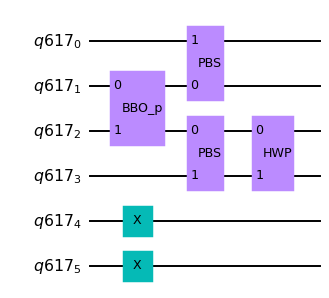

In [41]:
qc.decompose().draw(output = 'mpl', scale = 0.7)

### Cálculos

#### QWP$_{in}$

In [52]:
for j in range(0,d):
    ret_rhob_0bWZ_in[j] = projM_np(8, '0', ret_rhob_AbWZ_in[j])
    ret_Phi_b_0bWZ_in[j] = dephasing_map_3qubits_np(ret_rhob_0bWZ_in[j])
    ret_Irr_b_in[j] = entropy(ret_Phi_b_0bWZ_in[j]) - entropy(ret_rhob_0bWZ_in[j])
    print(ret_Irr_b_in[j])

0.018987056255594492
0.04801487611629862
0.14927440992896357
0.2133427402368454
0.29018166010561164
0.3833800025398766
0.46044732269099853
0.5221012136705849
0.5298971498306021
0.5349601201806012
0.5222777796382683
0.5348456726263274
0.47825150262170457
0.4031332862025323
0.3342801365526341
0.21981974620756806
0.14904974572909224
0.06765554611756497
0.03616602104092492
0.009820341851665582
0.02112206401021599


#### QWP$_{out}$

In [60]:
for j in range(0,d):
    ret_rhob_0bWZ_out[j] = projM_np(8, '0', ret_rhob_AbWZ_out[j])
    ret_Phi_b_0bWZ_out[j] = dephasing_map_3qubits_np(ret_rhob_0bWZ_out[j])
    ret_Irr_b_out[j] = entropy(ret_Phi_b_0bWZ_out[j]) - entropy(ret_rhob_0bWZ_out[j])
    print(ret_Irr_b_out[j])

0.03724904333858425
0.026173457920199206
0.036787517030279826
0.03918968650143695
0.04380441235784438
0.04703039971492984
0.05130806727519588
0.05182945190347421
0.06509734553319901
0.0654033969086747
0.07800331537452165
0.06853908545551568
0.08666009367520044
0.09306700003101986
0.12315314922412957
0.09969104771177384
0.08370435842781565
0.0928082934845833
0.05141666168616865
0.04320399966120547
0.04547018050152074


## Resultados teóricos

In [70]:
thmax = math.pi-0.01;   dth = thmax/20; th = np.arange(0.01, thmax+dth, dth); d = th.shape[0]
the_Irr_b_in                 = np.zeros(th.shape[0])
the_Irr_b_out                = np.zeros(th.shape[0])

In [71]:
for j in range(0,d):
    c_plus = np.cos(th[j]/2)
    c_minus = np.sqrt(1 - c_plus**2)
    the_Irr_b_in[j] = -1.0 * c_plus**2 * np.log2(1.0 * c_plus**2) - c_minus**2 * np.log2(c_minus**2)
    the_Irr_b_out[j] = 0
    print(the_Irr_b_in[j])

0.00041825654974191235
0.05960827160488702
0.1732975820045815
0.3131570775169316
0.4621607944535125
0.607604014273341
0.7394634336049204
0.849811316538504
0.932583510389106
0.9834895100553851
0.9999819663871292
0.9812490235560026
0.9282133180193721
0.8435331680632676
0.7316110586657141
0.5986265342290418
0.45263200118252755
0.30379873295430637
0.1650395819160478
0.05377438056525288
4.038739397709968e-31


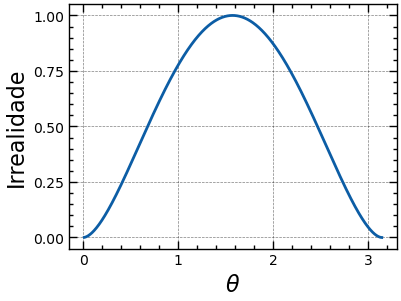

In [72]:
import numpy as np
import matplotlib.pyplot as plt

def func(theta):
    c_plus = np.cos(theta/2)
    c_minus = np.sqrt(1 - c_plus**2)
    return -1.0 * c_plus**2 * np.log2(1.0 * c_plus**2) - c_minus**2 * np.log2(c_minus**2)

theta_vals = np.linspace(0.01, np.pi, 1000)
y_vals = func(theta_vals)

plt.figure(figsize = (4,3), constrained_layout = True)
plt.style.use(['science', 'notebook', 'grid'])
plt.plot(theta_vals, y_vals)
plt.xlabel(r'$\theta$')
plt.ylabel('Irrealidade')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.title('Gráfico da função')
plt.show()


#### Gráficos

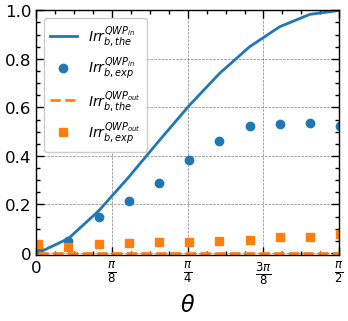

In [83]:
import string
plt.figure(figsize = (6.5, 3.2), constrained_layout = True)
#plt.subplots(figsize=(6.5, 3.2))
font = {'family': 'Verdana', 'color':  'black', 'size': 20}
#
plt.style.use(['science', 'notebook', 'grid'])
ax0 = plt.subplot(121)
plt.gca().set_xlim([-0.01,3.14])
plt.gca().set_ylim([-0.01,0.52])
#
# simulation
#
plt.plot(th[:len(th)//2+1], the_Irr_b_in[:len(th)//2+1], '-' ,
         color='#1f77b4', label = r'$Irr_{b, the}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], ret_Irr_b_in[:len(th)//2+1], 'o' ,
         color='#1f77b4', label = r'$Irr_{b, exp}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], the_Irr_b_out[:len(th)//2+1], '--',
         color='#ff7f0e', label = r'$Irr_{b,the}^{QWP_{out}}$')
plt.plot(th[:len(th)//2+1], ret_Irr_b_out[:len(th)//2+1], 's',
         color='#ff7f0e', label = r'$Irr_{b,exp}^{QWP_{out}}$')
#
#
plt.legend(bbox_to_anchor=(0.195, 0.695), loc='center',
           borderaxespad=0, fontsize=10)
#, frameon=False, handlelength=1.5
plt.xlabel(r'$\theta$')
tick_posx= [0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2]
#, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi]
labelsx = ['0', r'$\frac{\pi}{8}$', r'$\frac{\pi}{4}$',
           r'$\frac{3\pi}{8}$', r'$\frac{\pi}{2}$']
#, r'$\frac{3\pi}{4}$', r'$\pi$', r'$\frac{5\pi}{4}$'
#, r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$', r'$2\pi$']
tick_posy= [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labelsy = ['0', '0.2', '0.4', '0.6', '0.8', '1.0']
#tick_posx= [0, 5]
#labelsx = ['0', '5']
plt.xlim([0, np.pi/2])
plt.xticks(tick_posx, labelsx)
plt.yticks(tick_posy, labelsy)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.tick_params('y', labelleft=False)
#ax1.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax1.transAxes, 
#            size=20, weight='bold')
#
#plt.tight_layout()
#plt.savefig('zgraph_CCR_vpv=0_sim.pdf', format='pdf', dpi = 1200, bbox_inches='tight')
plt.show()

## Mitigação $b_{in}$

In [84]:
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter

In [20]:
start_time1_mit = time.time()
print(device)
qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
qubit_list = [1,3,4,5] # os qubits para os quais aplicaremos calibracao de medidas
meas_calibs, state_labels = complete_meas_cal(qubit_list = qubit_list, qr = qr)
job = qiskit.execute(meas_calibs, backend = device, shots = nshots)
print(job.job_id())
job_monitor(job)
meas_fitter = CompleteMeasFitter(job.result(), state_labels)
end_time1_mit = time.time()

ibm_nairobi
chdn6tim9ctescqge6gg
Job Status: job has successfully run


In [24]:
execution_time1_mit_seg = end_time1_mit - start_time1_mit
print("Tempo de execução:", round(execution_time1_mit_seg, 2), "segundos")
execution_time1_mit_min = execution_time1_mit_seg/60
print("Tempo de execução:", round(execution_time1_mit_min, 2), "minutos")
execution_time1_mit_h = execution_time1_mit_min/60
print("Tempo de execução:", round(execution_time1_mit_h, 2), "horas")

Tempo de execução: 32082.03 segundos
Tempo de execução: 534.7 minutos
Tempo de execução: 8.91 horas


In [87]:
thmax = math.pi-0.01;   dth = thmax/20; th = np.arange(0.01, thmax+dth, dth); d = th.shape[0]
mit_rhob_AbWZ_in             = np.zeros(th.shape[0], dtype=object)
mit_rhob_AbWZ_out            = np.zeros(th.shape[0], dtype=object)
mit_rhob_0bWZ_in             = np.zeros(th.shape[0], dtype=object)
mit_rhob_0bWZ_out            = np.zeros(th.shape[0], dtype=object)
mit_Phi_b_0bWZ_in            = np.zeros(th.shape[0], dtype=object)
mit_Phi_b_0bWZ_out           = np.zeros(th.shape[0], dtype=object)
mit_Irr_b_in                 = np.zeros(th.shape[0])
mit_Irr_b_out                = np.zeros(th.shape[0])

### Retrieve do job da mitigação

In [86]:
print(device)
qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
qubit_list = [1,3,4,5] # os qubits para os quais aplicaremos calibracao de medidas
meas_calibs, state_labels = complete_meas_cal(qubit_list = qubit_list, qr = qr)
job_ret_b_in = device.retrieve_job('chdn6tim9ctescqge6gg')
print(job_ret_b_in.job_id())
job_monitor(job_ret_b_in)
meas_fitter = CompleteMeasFitter(job_ret_b_in.result(), state_labels)

ibm_nairobi
chdn6tim9ctescqge6gg
Job Status: job has successfully run


In [88]:
print(device)
for j in range(0, d):
    print(list_ids_b_in_[j])
    job_ret_b_in = device.retrieve_job(list_ids_b_in_[j])
    mitigated_results_b_in = meas_fitter.filter.apply(job_ret_b_in.result())
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]]) # circuit for state tomography
    qstf_mit_b_in = StateTomographyFitter(mitigated_results_b_in, qstc)
    print(job_ret_b_in.job_id())
    #
    # rho
    #
    mit_rhob_AbWZ_in[j] = qstf_mit_b_in.fit(method='lstsq')
    #
    mit_rhob_0bWZ_in[j] = projM_np(8, '0', mit_rhob_AbWZ_in[j])
    mit_Phi_b_0bWZ_in[j] = dephasing_map_3qubits_np(mit_rhob_0bWZ_in[j])
    mit_Irr_b_in[j] = entropy(mit_Phi_b_0bWZ_in[j]) - entropy(mit_rhob_0bWZ_in[j])
    print(mit_Irr_b_in[j])
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

ibm_nairobi
chb0nc0dickn60j1i23g
chb0nc0dickn60j1i23g
0.016730032795788385
j =  0  - theta = 0.01
chb1fl5v6mngo8m6h6l0
chb1fl5v6mngo8m6h6l0
0.05390718440950387
j =  1  - theta = 0.16657963267948966
chb5628fdairicmktu60
chb5628fdairicmktu60
0.19546073098320815
j =  2  - theta = 0.3231592653589793
chb8u1pmfb1ddb4vccb0
chb8u1pmfb1ddb4vccb0
0.285120607333142
j =  3  - theta = 0.479738898038469
chbckvoo51arsodcbrbg
chbckvoo51arsodcbrbg
0.3843644454497728
j =  4  - theta = 0.6363185307179586
chbfp70o51arsode4alg
chbfp70o51arsode4alg
0.5081508196624418
j =  5  - theta = 0.7928981633974483
chbgbilv6mngo8mib9p0
chbgbilv6mngo8mib9p0
0.6191500929121598
j =  6  - theta = 0.9494777960769379
chbhv5lv6mngo8mjavhg
chbhv5lv6mngo8mjavhg
0.7238737139254754
j =  7  - theta = 1.1060574287564275
chbk249mfb1ddb55e200
chbk249mfb1ddb55e200
0.7218386174328134
j =  8  - theta = 1.2626370614359173
chbnos44cg5fl02loklg
chbnos44cg5fl02loklg
0.7721987427357264
j =  9  - theta = 1.419216694115407
chbosipmfb1ddb58sfa0

## Mitigação $b_{out}$

In [92]:
print(device)
for j in range(0, d):
    print(list_ids_b_out_[j])
    job_ret_b_out = device.retrieve_job(list_ids_b_out_[j])
    mitigated_results_b_out = meas_fitter.filter.apply(job_ret_b_out.result())
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]]) # circuit for state tomography
    qstf_mit_b_out = StateTomographyFitter(mitigated_results_b_out, qstc)
    print(job_ret_b_out.job_id())
    #
    # rho
    #
    mit_rhob_AbWZ_out[j] = qstf_mit_b_out.fit(method='lstsq')
    #
    mit_rhob_0bWZ_out[j] = projM_np(8, '0', mit_rhob_AbWZ_out[j])
    mit_Phi_b_0bWZ_out[j] = dephasing_map_3qubits_np(mit_rhob_0bWZ_out[j])
    mit_Irr_b_out[j] = entropy(mit_Phi_b_0bWZ_out[j]) - entropy(mit_rhob_0bWZ_out[j])
    print(mit_Irr_b_out[j])
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

ibm_nairobi
chelpsn7uma4tn78rc2g
chelpsn7uma4tn78rc2g
0.035263365827345405
j =  0  - theta = 0.01
chep59kqqnv6prm1uccg
chep59kqqnv6prm1uccg
0.02683132935404714
j =  1  - theta = 0.16657963267948966
chesmsf9targ2vpmqkig
chesmsf9targ2vpmqkig
0.04381663616880796
j =  2  - theta = 0.3231592653589793
chf07ob66hmpifuql4jg
chf07ob66hmpifuql4jg
0.04378617485974917
j =  3  - theta = 0.479738898038469
chf0fj79targ2vpr406g
chf0fj79targ2vpr406g
0.05091793859367538
j =  4  - theta = 0.6363185307179586
chf0jqvppn69h5prdplg
chf0jqvppn69h5prdplg
0.05482858585657824
j =  5  - theta = 0.7928981633974483
chf0o1nppn69h5pri8a0
chf0o1nppn69h5pri8a0
0.06272821983868965
j =  6  - theta = 0.9494777960769379
chf0s8g4sb77opi8pskg
chf0s8g4sb77opi8pskg
0.06272537910632772
j =  7  - theta = 1.1060574287564275
chf10jmo5i9gdbb1rjsg
chf10jmo5i9gdbb1rjsg
0.0828930971163224
j =  8  - theta = 1.2626370614359173
chf4t0sp8f687ogloj2g
chf4t0sp8f687ogloj2g
0.09115626973940644
j =  9  - theta = 1.419216694115407
chf8gc6o5i9gd

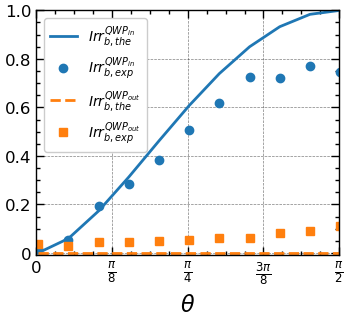

In [93]:
import string
plt.figure(figsize = (6.5, 3.2), constrained_layout = True)
#plt.subplots(figsize=(6.5, 3.2))
font = {'family': 'Verdana', 'color':  'black', 'size': 20}
#
plt.style.use(['science', 'notebook', 'grid'])
ax0 = plt.subplot(121)
plt.gca().set_xlim([-0.01,3.14])
plt.gca().set_ylim([-0.01,0.52])
#
# simulation
#
plt.plot(th[:len(th)//2+1], the_Irr_b_in[:len(th)//2+1], '-' ,
         color='#1f77b4', label = r'$Irr_{b, the}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], mit_Irr_b_in[:len(th)//2+1], 'o' ,
         color='#1f77b4', label = r'$Irr_{b, exp}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], the_Irr_b_out[:len(th)//2+1], '--',
         color='#ff7f0e', label = r'$Irr_{b,the}^{QWP_{out}}$')
plt.plot(th[:len(th)//2+1], mit_Irr_b_out[:len(th)//2+1], 's',
         color='#ff7f0e', label = r'$Irr_{b,exp}^{QWP_{out}}$')
#
#
plt.legend(bbox_to_anchor=(0.195, 0.695), loc='center',
           borderaxespad=0, fontsize=10)
#, frameon=False, handlelength=1.5
plt.xlabel(r'$\theta$')
tick_posx= [0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2]
#, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi]
labelsx = ['0', r'$\frac{\pi}{8}$', r'$\frac{\pi}{4}$',
           r'$\frac{3\pi}{8}$', r'$\frac{\pi}{2}$']
#, r'$\frac{3\pi}{4}$', r'$\pi$', r'$\frac{5\pi}{4}$'
#, r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$', r'$2\pi$']
tick_posy= [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labelsy = ['0', '0.2', '0.4', '0.6', '0.8', '1.0']
#tick_posx= [0, 5]
#labelsx = ['0', '5']
plt.xlim([0, np.pi/2])
plt.xticks(tick_posx, labelsx)
plt.yticks(tick_posy, labelsy)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.tick_params('y', labelleft=False)
#ax1.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax1.transAxes, 
#            size=20, weight='bold')
#
#plt.tight_layout()
#plt.savefig('zgraph_CCR_vpv=0_sim.pdf', format='pdf', dpi = 1200, bbox_inches='tight')
plt.show()

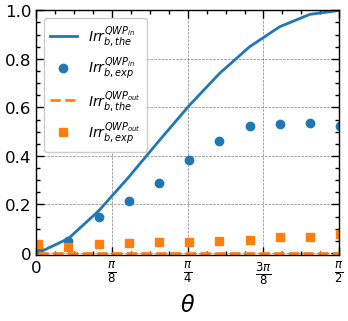

In [83]:
Resultado apenas do experimento